**PROJECT TEAM ID**: PTID-CDS-DEC-23-1712  
**PROJECT CODE**   : PRCP-1002-HandwrittenDigits  
**PROJECT NAME**   : Handwritten Digits Image Processing Dataset

# Business Case
* The MNIST dataset is a widely-used dataset in the field of machine learning and computer vision. 
* It stands for Modified National Institute of Standards and Technology, and it is a collection of handwritten digits commonly used for training various image processing systems.
* MNIST was created by modifying the original NIST (National Institute of Standards and Technology) dataset. The modifications include normalization and centering of the images.
* MNIST contains a total of 70,000 images. This dataset is typically split into 60,000 training images and 10,000 testing images
* The dataset consists of 28x28 pixel grayscale images of handwritten digits (0 through 9). Each image is a 2D array, and each pixel represents the intensity of the grayscale (usually ranging from 0 to 255).
* MNIST is often used as a benchmark dataset for developing and testing image classification algorithms, particularly for handwritten digit recognition. It serves as a simple yet effective starting point for learning and experimentation.
* MNIST has become a standard benchmark for evaluating the performance of various machine learning and deep learning models, especially in the early stages of learning. It's a common dataset for understanding and implementing image classification techniques.
* In summary, MNIST is a foundational dataset that has played a crucial role in advancing the field of computer vision and machine learning. While it may be considered basic by today's standards, its historical significance and continued use make it an important resource for learning and experimentation.


# Domain Analysis

* Grayscale, also known as black-and-white or monochrome, is a range of shades of gray without apparent color. In the context of images, grayscale refers to images composed exclusively of shades of gray, with no color information. Each pixel in a grayscale image represents the intensity of light, and the variation in intensity creates different shades of gray.  

**Intensity Levels:**
* In a grayscale image, each pixel's intensity level is typically represented by a single value. Commonly, this value ranges from 0 to 255, with 0 being black (no intensity) and 255 being white (maximum intensity). The values in between represent different shades of gray.  
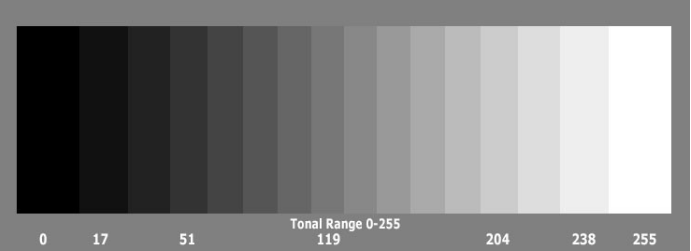


**Pixel Values:**
* A pixel's intensity value in a grayscale image corresponds to the amount of light or darkness at that pixel's location. Lower values represent darker shades, while higher values represent lighter shades.  

**Single Channel:**
* Grayscale images have only one channel, as opposed to color images that may have multiple channels (e.g., Red, Green, Blue in RGB color space). In grayscale, the single channel encodes the overall brightness information.  


**Image Representation:**
* Grayscale images can be represented as 2D arrays, where each element in the array corresponds to the intensity value of a pixel at a specific location in the image. The size of the array corresponds to the image resolution.




**Architecture of CNN for Image recognisation:**

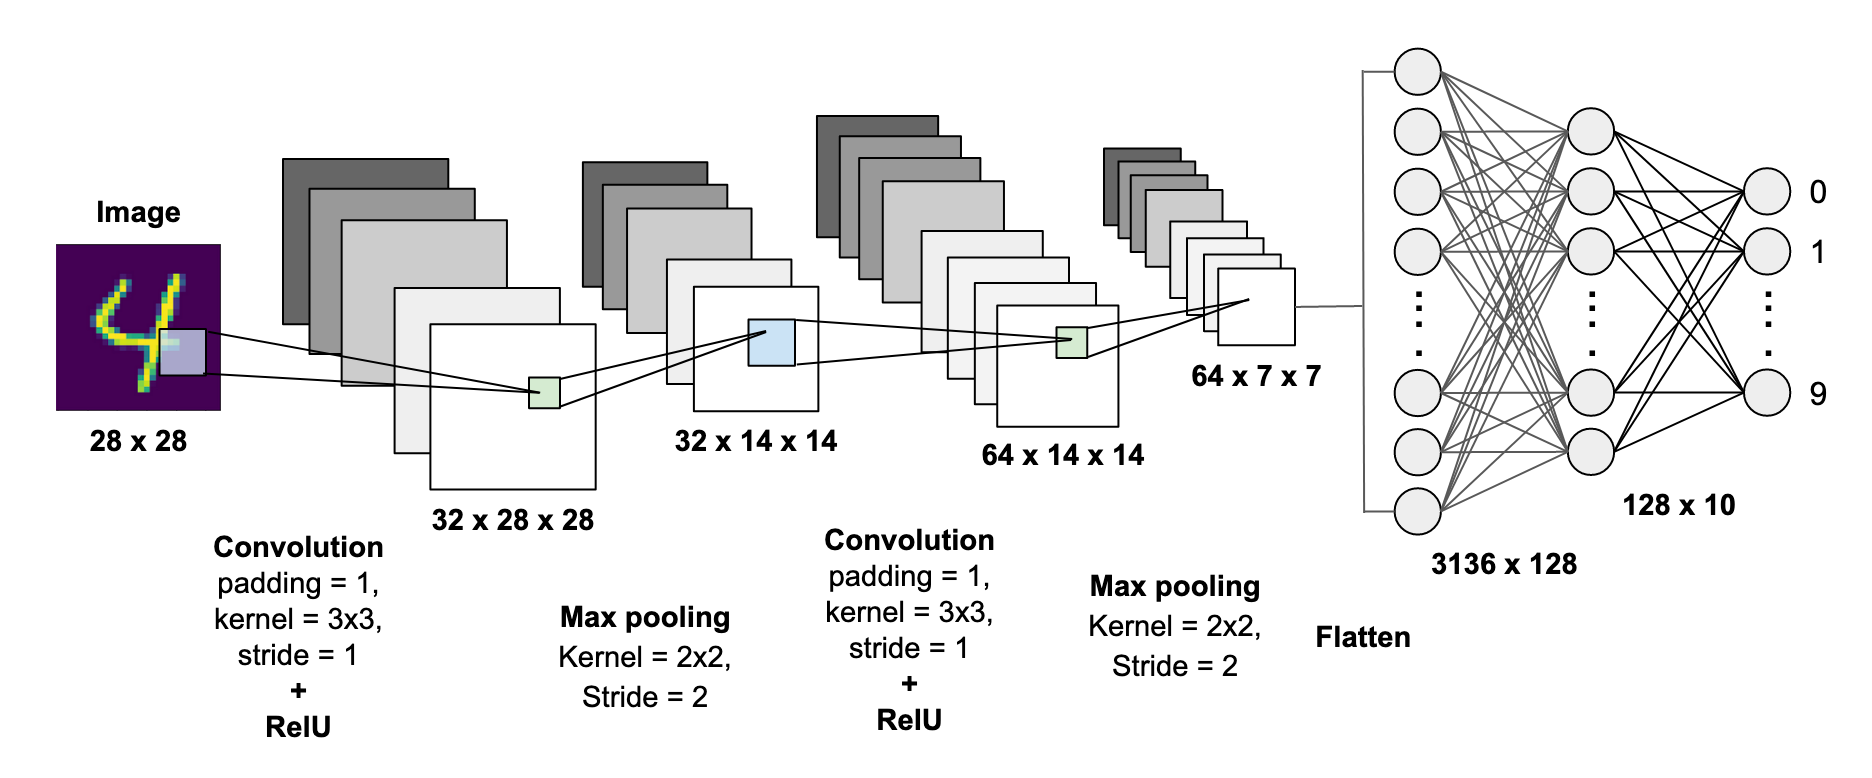

In [1]:
# Import basic libraries

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [7]:
# Normalizing the data between 0 and 1
train_images=train_images.astype('float32') / 255
test_images=test_images.astype('float32') / 255

In [8]:
train_images.shape

(60000, 28, 28, 1)

In [9]:
test_images.shape

(10000, 28, 28, 1)

In [10]:
# One-hot encode the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

### Visualizing the random image

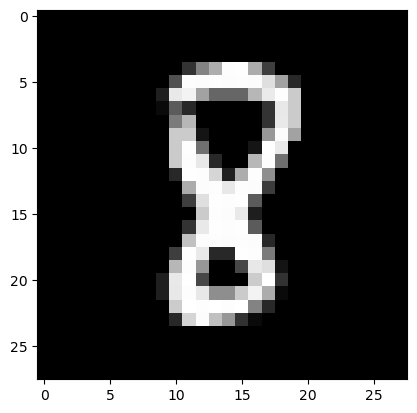

In [12]:
import random
import matplotlib.pyplot as plt
import numpy as np
idx=random.randint(0,len(train_images))
plt.imshow(train_images[idx,:],cmap='gray')
plt.show()

### Visualize the First 36 Training Images

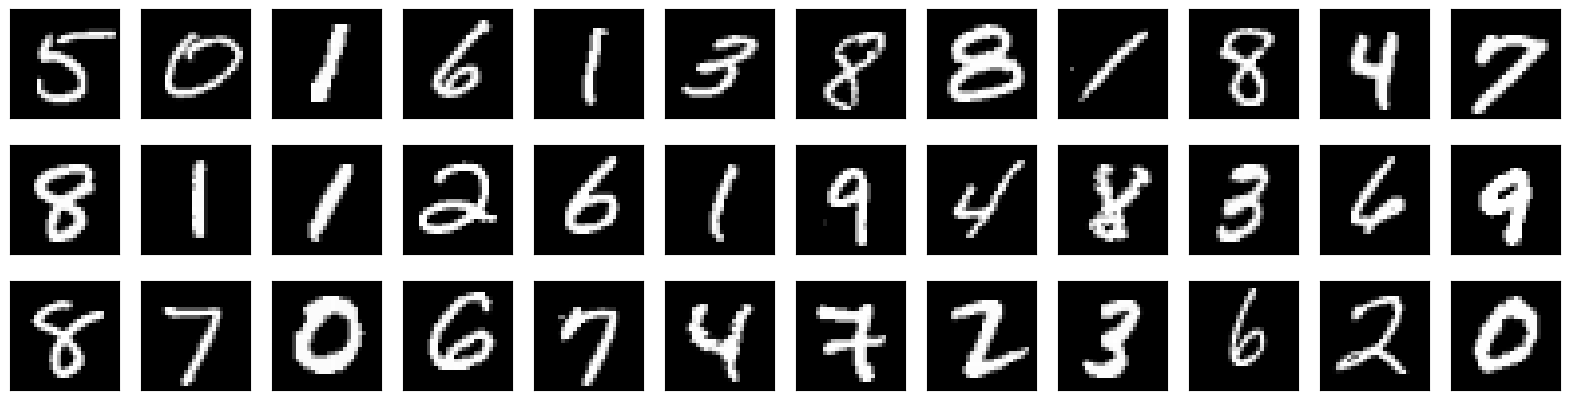

In [13]:

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(train_images[i]),cmap='gray')

In [14]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
history=model.fit(train_images,train_labels,epochs=15,batch_size=64,validation_data=(val_images, val_labels))

Epoch 1/15


750/750 [==============================] - 11s 12ms/step - loss: 0.3272 - accuracy: 0.8958 - val_loss: 0.0755 - val_accuracy: 0.9784
Epoch 2/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0999 - accuracy: 0.9699 - val_loss: 0.0485 - val_accuracy: 0.9851
Epoch 3/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0743 - accuracy: 0.9774 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 4/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0601 - accuracy: 0.9822 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 5/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0521 - accuracy: 0.9842 - val_loss: 0.0378 - val_accuracy: 0.9879
Epoch 6/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0327 - val_accuracy: 0.9899
Epoch 7/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0402 - accuracy: 0.9878 - val_loss: 0.0338 - val_accuracy: 0.9

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

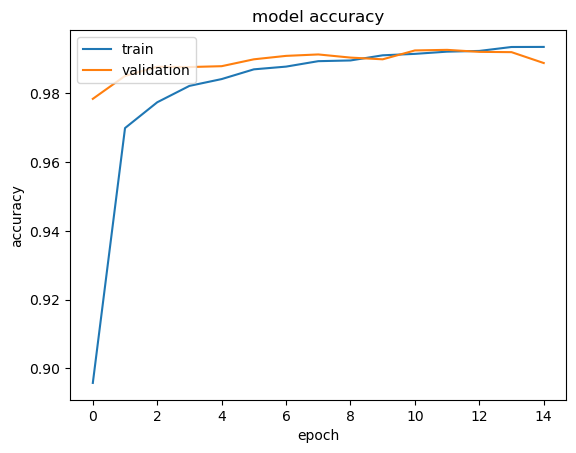

In [18]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'],loc='upper left')
plt.show()

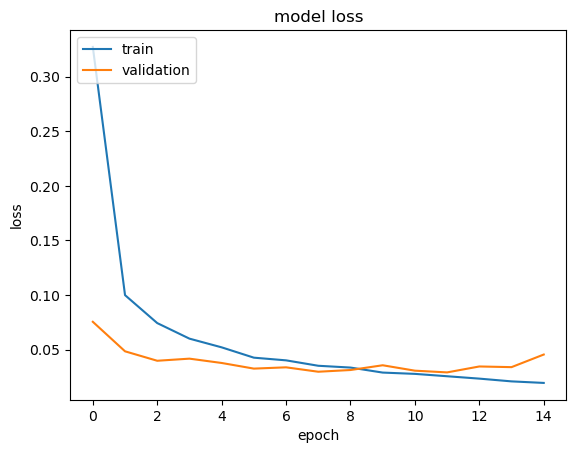

In [19]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [20]:
y_pred=model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [21]:
Handwritten_digits=[0,1,2,3,4,5,6,7,8,9]

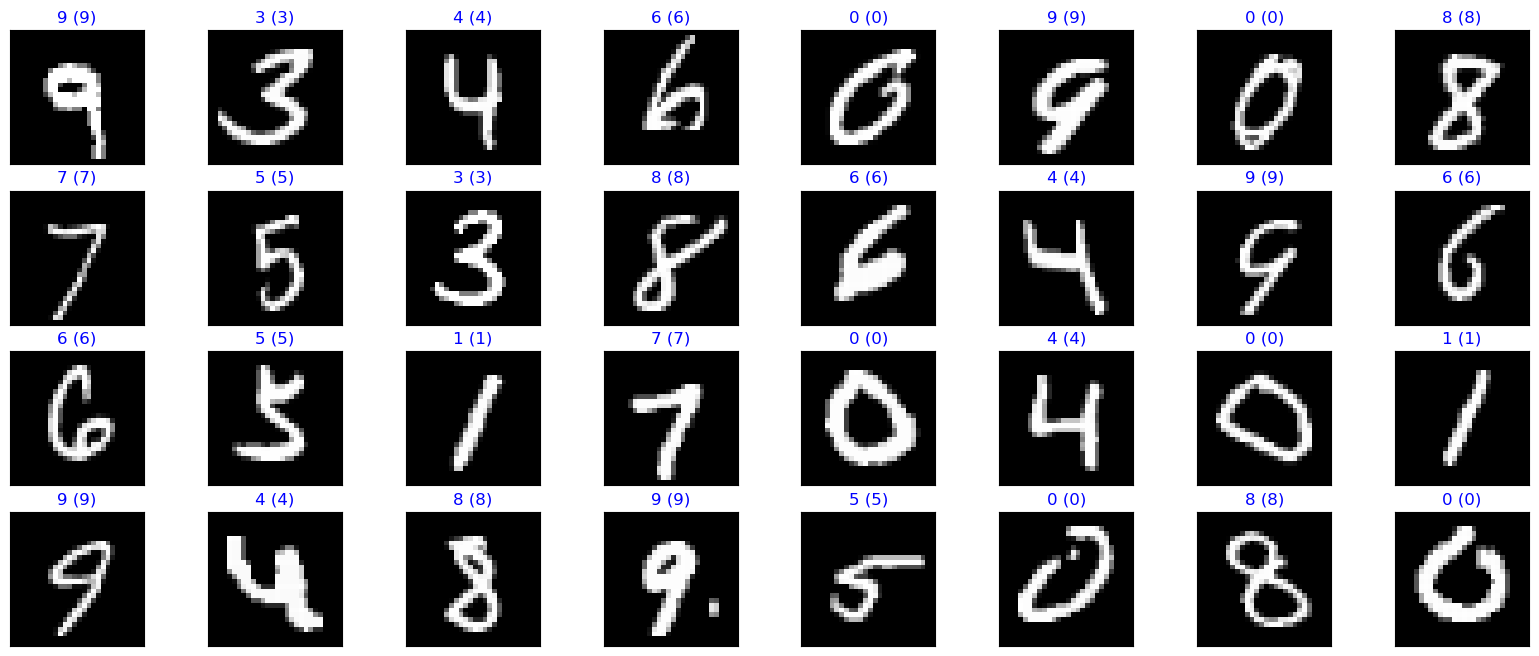

In [22]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(test_images.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]),cmap='gray')
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(test_labels[idx])
    ax.set_title("{} ({})".format(Handwritten_digits[pred_idx], Handwritten_digits[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0296 - accuracy: 0.9924


In [24]:
print('Accuracy for CNN:',test_acc)

Accuracy for CNN: 0.9923999905586243


## Model Creation by using Machine Learning Models

In [2]:
#importing the basic librariers
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist=fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [4]:
x,y=mnist['data'],mnist['target']

In [5]:
x= x.astype('float32') / 255.0

In [6]:
y=y.astype(int)

In [7]:
x.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
x_train.shape

(56000, 784)

In [34]:
x_test.shape

(14000, 784)

In [35]:
y_train.shape

(56000,)

# Model Creation by using Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr= LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred_lr =lr.predict(x_test)

In [40]:
y_pred_lr_train = lr.predict(x_train)

### Model Evaluation 

In [41]:
accuracy_score(y_test,y_pred_lr)

0.9202857142857143

In [42]:
print(f"Logistic_Regression Accuracy Score test data :{accuracy_score(y_test,y_pred_lr)}")
print(f"Logistic_Regression Accuracy Score train data :{accuracy_score(y_train,y_pred_lr_train)}")

Logistic_Regression Accuracy Score test data :0.9202857142857143
Logistic_Regression Accuracy Score train data :0.9363392857142857


In [43]:
print(f"Logistic_Regression classification report for test data :{classification_report(y_test,y_pred_lr)}")
print(f"Logistic_Regression classification report for train data :{classification_report(y_train,y_pred_lr_train)}")

Logistic_Regression classification report for test data :              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.90      0.90      1433
           4       0.92      0.93      0.92      1295
           5       0.87      0.89      0.88      1273
           6       0.95      0.95      0.95      1396
           7       0.93      0.94      0.94      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.89      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

Logistic_Regression classification report for train data :              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5560
           1     

## Model Creation By Using KNN Classifier

In [44]:
knn = KNeighborsClassifier()

In [45]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
y_pred_knn = knn.predict(x_test)

In [47]:
y_pred_knn_train = knn.predict(x_train)

### Model Evaluation KNN - Classifier

In [48]:
print(f"KNN Accuracy Score test data :{accuracy_score(y_test,y_pred_knn)}")
print(f"KNN Accuracy Score train data :{accuracy_score(y_train,y_pred_knn_train)}")

KNN Accuracy Score test data :0.9700714285714286
KNN Accuracy Score train data :0.9808392857142857


In [49]:
# classification report for test data 
print(f"KNN Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_knn)}")
# classification report for train  data 
print(f"KNN Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_knn_train)}")

KNN Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

KNN Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5560
           1       

## Model Creation by Using SVM - Classifier

In [50]:
svc = SVC()

In [51]:
svc.fit(x_train, y_train)

SVC()

In [52]:
y_pred_svc = svc.predict(x_test)

In [53]:
y_pred_svc_train = svc.predict(x_train)

### Model Evaluation SVM - classifier

In [54]:
print(f"SVC Accuracy Score test data :{accuracy_score(y_test,y_pred_svc)}")
print(f"SVC Accuracy Score train data :{accuracy_score(y_train,y_pred_svc_train)}")

SVC Accuracy Score test data :0.9764285714285714
SVC Accuracy Score train data :0.9899464285714286


In [55]:
# classification report for test data 
print(f"SVM - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_svc)}")
# classification report for train data 
print(f"SVM - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_svc_train)}")

SVM - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.97      0.97      1503
           8       0.97      0.96      0.97      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

SVM - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5560
           1   

## Model Creation By Using Decision Tree Classifier

In [11]:
dtc = DecisionTreeClassifier()

In [57]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred_dtc= dtc.predict(x_test)

In [59]:
y_pred_dtc_train=dtc.predict(x_train)

#### Model Evaluation Decision Tree

In [60]:
print(f"Decision Tree Accuracy Score test data :{accuracy_score(y_test,y_pred_dtc)}")
print(f"Decision Tree Accuracy Score train data :{accuracy_score(y_train,y_pred_dtc_train)}")

Decision Tree Accuracy Score test data :0.8712857142857143
Decision Tree Accuracy Score train data :1.0


In [61]:
# classification report for test data 
print(f"decision Tree - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_dtc)}")
# classification report for train data 
print(f"Decision Tree - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_dtc_train)}")

decision Tree - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.86      0.83      0.85      1380
           3       0.83      0.84      0.84      1433
           4       0.84      0.87      0.86      1295
           5       0.83      0.81      0.82      1273
           6       0.90      0.91      0.90      1396
           7       0.91      0.91      0.91      1503
           8       0.81      0.81      0.81      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000

Decision Tree - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

### HyperParameter Tuning for Decision Tree 

In [62]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dtc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [63]:
best_dt_model = grid_search.best_estimator_
y_pred_dtc = best_dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_dtc)
print("Test Accuracy with Best Hyperparameters:", accuracy)

Test Accuracy with Best Hyperparameters: 0.8743571428571428


## Model creation by using Random Forest Classifier

In [64]:
rfc=RandomForestClassifier()

In [65]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
y_pred_rfc=rfc.predict(x_test)

In [67]:
y_pred_rfc_train = rfc.predict(x_train)

## Model Evaluation Random Forest Classifier

In [68]:
print(f"Random Forest Accuracy Score test data :{accuracy_score(y_test,y_pred_rfc)}")
print(f"Random Forest Accuracy Score train data :{accuracy_score(y_train,y_pred_rfc_train)}")

Random Forest Accuracy Score test data :0.967
Random Forest Accuracy Score train data :1.0


In [69]:
# classification report for test data 
print(f"Random forest - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_rfc)}")
# classification report for train data 
print(f"Random forest - Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_rfc_train)}")

Random forest - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.96      0.96      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Random forest - Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

## HyperParameter Tuning for Random Forest

In [70]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rfc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [71]:
# Evaluate the model on the test set using the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_rfc = best_rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_rfc)
print("Test Accuracy with Best Hyperparameters:", accuracy)

Test Accuracy with Best Hyperparameters: 0.9678571428571429


## Model Creation by using Xgboost Classifier

In [72]:
xgc = XGBClassifier()

In [73]:
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
y_pred_xgc = xgc.predict(x_test)

In [75]:
y_pred_xgc_train= xgc.predict(x_train)

## Model Evaluation XGBoost Classifier

In [76]:
print(f"XGBoost Accuracy Score test data :{accuracy_score(y_test,y_pred_xgc)}")
print(f"XGBoost Accuracy Score train data :{accuracy_score(y_train,y_pred_xgc_train)}")

XGBoost Accuracy Score test data :0.9780714285714286
XGBoost Accuracy Score train data :1.0


In [77]:
# classification report for test data 
print(f"XgBoost - Classifier--classification_report for test data:---\n{classification_report(y_test,y_pred_xgc)}")
# classification report for train data 
print(f"XgBoost Classifier--classification_report for train data:---\n{classification_report(y_train, y_pred_xgc_train)}")

XgBoost - Classifier--classification_report for test data:---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.97      1380
           3       0.98      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.97      0.98      1503
           8       0.97      0.97      0.97      1357
           9       0.97      0.97      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000

XgBoost Classifier--classification_report for train data:---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5560
         

**Upon examining the variance in evaluation scores between our training and testing datasets, it has become evident that our model is experiencing overfitting. In response to this observation, we are now engaged in the process of hyperparameter tuning to enhance our model's performance and achieve more favorable evaluation scores.**

## HyperParameter Tuning for XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Use GridSear


chCV for hyperparameter tuning
grid= RandomizedSearchCV(xgc, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
best_xgb_model = grid.best_estimator_
y_pred_xgc = best_xgb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_xgc)
print("Test Accuracy with Best Hyperparameters:", accuracy)

# By using bagging base estimator is Decision Tree

In [12]:
from sklearn.ensemble import BaggingClassifier
model_bagg = BaggingClassifier(base_estimator=dtc, n_estimators=30,random_state=15)

model_bagg.fit(x_train,y_train)

y_pred_bagg = model_bagg.predict(x_test)

In [13]:
rfc_pred_train=model_bagg.predict(x_train)

In [14]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_bagg)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,rfc_pred_train)}")

 accuracy_score for test data : 0.9562857142857143
 accuracy_score for train data : 0.999875


## Conclusions:

#### CNN Model:

Accuracy_score :0.9923999905586243
    
#### LogisticRegression Model:

Accuracy_score :0.9202857142857143

#### K Nearest Neighbors Classifier Model:

Accuracy_score : 0.9700714285714286
    
#### SVM Classifier Model:
    
Accuracy_score :0.9764285714285714
    
#### Decision Tree Classifier Model:

Accuracy_score : 0.8748571428571429   
  
#### Random Forest Classifier Model:

Accuracy_score : 0.9681428571428572

#### Extreme Gradient Boosting Classifier Model:

Accuracy_score :  0.9715

#### Bagging using Decision-Tree:
Accuracy_score: 0.9562857142857143





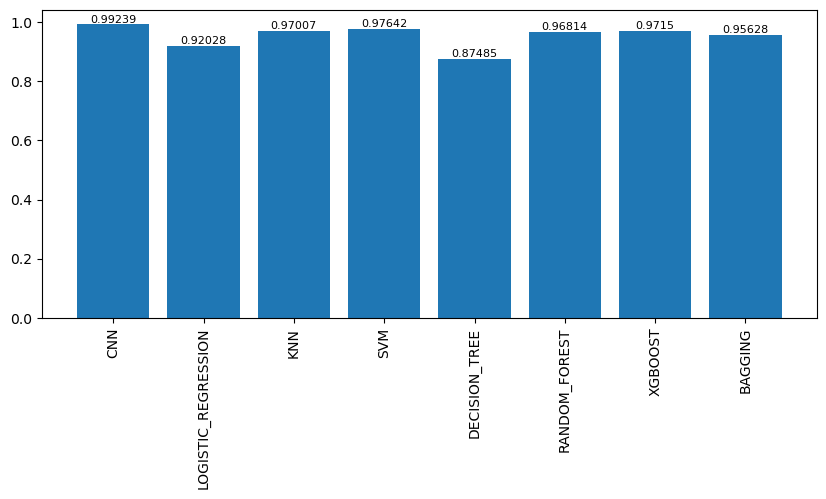

In [15]:
import matplotlib.pyplot as plt

Models = ['CNN', 'LOGISTIC_REGRESSION', 'KNN', 'SVM', 'DECISION_TREE', 'RANDOM_FOREST', 'XGBOOST', 'BAGGING']
Accuracy = [0.99239, 0.92028, 0.97007, 0.97642, 0.87485, 0.96814, 0.9715, 0.95628]

plt.figure(figsize=(10, 4))
bars = plt.bar(Models, Accuracy)

# Add labels on top of the bars
for bar, label in zip(bars, Accuracy):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(label, 5), ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=90)
plt.show()


### Result:
In our exploration of different models for recognizing handwritten digits, the Convolutional Neural Network (CNN) emerged as the most effective choice. CNNs have proven to be particularly well-suited for image recognition tasks, and their architecture aligns seamlessly with the characteristics of handwritten digit datasets.

### Challenges Faced:
* Importing the data by using sklearn
* Optimizing hyperparameters for complex models like decision trees, random forests, bagging, boosting, and CNNs can be a time-consuming process, particularly when dealing with large datasets. Streamlining the hyperparameter tuning phase to achieve optimal performance across these diverse models in a shorter timeframe continues to be a significant challenge in machine learning.